In [ ]:
from google.colab import files
da = files.upload()

Saving powerconsumption.csv to powerconsumption.csv


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
power_consumption_data = pd.read_csv('powerconsumption.csv')

In [ ]:
power_consumption_data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## **Preprocessing:**

### **Convert 'Datetime' to DateTime Format:**

In [ ]:
power_consumption_data['Datetime'] = pd.to_datetime(power_consumption_data['Datetime'])


### **Check for Missing Values**

In [ ]:
missing_values = power_consumption_data.isnull().sum()


**Normalize or Scale the Data:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows',
                    'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
power_consumption_data[columns_to_scale] = scaler.fit_transform(power_consumption_data[columns_to_scale])



### **Create Time Series Features:**

In [ ]:
power_consumption_data['Hour'] = power_consumption_data['Datetime'].dt.hour
power_consumption_data['DayOfWeek'] = power_consumption_data['Datetime'].dt.dayofweek


In [ ]:
print(power_consumption_data.head())


             Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-01-01 00:00:00    -2.106645  0.356277  -0.798900            -0.690797   
1 2017-01-01 00:10:00    -2.131578  0.401291  -0.798900            -0.690725   
2 2017-01-01 00:20:00    -2.148946  0.401291  -0.800178            -0.690755   
3 2017-01-01 00:30:00    -2.181962  0.433443  -0.798900            -0.690646   
4 2017-01-01 00:40:00    -2.216353  0.478456  -0.799752            -0.690808   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0     -0.603085                0.239917               -0.944672   
1     -0.603359               -0.354854               -0.320573   
2     -0.603238               -0.451143               -0.391398   
3     -0.603270               -0.577254               -0.515516   
4     -0.603359               -0.702514               -0.609482   

   PowerConsumption_Zone3  Hour  DayOfWeek  
0                0.363262     0          6  
1                0.346669 

In [ ]:
print(power_consumption_data.describe())


        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  5.241600e+04  5.241600e+04  5.241600e+04         5.241600e+04   
mean   3.036507e-16  4.972281e-16 -2.602721e-17        -4.771655e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00         1.000010e+00   
min   -2.676165e+00 -3.660177e+00 -8.129499e-01        -6.909746e-01   
25%   -7.566132e-01 -6.397981e-01 -8.010291e-01        -6.907553e-01   
50%   -5.162819e-03  1.029180e-01 -7.976232e-01        -6.719446e-01   
75%    7.015789e-01  8.449911e-01  1.258286e+00         5.177920e-01   
max    3.645476e+00  1.706670e+00  1.925849e+00         3.707675e+00   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  5.241600e+04            5.241600e+04            5.241600e+04   
mean  -5.205441e-17           -3.470294e-17            9.977096e-17   
std    1.000010e+00            1.000010e+00            1.000010e+00   
min   -6.039543e-01           -2.587377e+00           -2.399813e+00

In [ ]:
print(power_consumption_data['Hour'].value_counts())
print(power_consumption_data['DayOfWeek'].value_counts())


0     2184
1     2184
22    2184
21    2184
20    2184
19    2184
18    2184
17    2184
16    2184
15    2184
14    2184
13    2184
12    2184
11    2184
10    2184
9     2184
8     2184
7     2184
6     2184
5     2184
4     2184
3     2184
2     2184
23    2184
Name: Hour, dtype: int64
6    7488
0    7488
1    7488
2    7488
3    7488
4    7488
5    7488
Name: DayOfWeek, dtype: int64


## **Feature Extraction with LSTM**

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame named 'power_consumption_data'
# and the columns to be used for LSTM are stored in 'columns_to_scale'
X = power_consumption_data[columns_to_scale].values

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(X_train.shape[1])
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape input data to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_reshaped, X_train, epochs=30, batch_size=32, validation_data=(X_test_reshaped, X_test), verbose=1, callbacks=[early_stopping])


Epoch 1/30
1311/1311 [==============================] - 28s 17ms/step - loss: 0.2175 - val_loss: 0.0426
Epoch 2/30
1311/1311 [==============================] - 22s 17ms/step - loss: 0.0590 - val_loss: 0.0167
Epoch 3/30
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0431 - val_loss: 0.0122
Epoch 4/30
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0349 - val_loss: 0.0077
Epoch 5/30
1311/1311 [==============================] - 22s 17ms/step - loss: 0.0299 - val_loss: 0.0069
Epoch 6/30
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0267 - val_loss: 0.0058
Epoch 7/30
1311/1311 [==============================] - 21s 16ms/step - loss: 0.0247 - val_loss: 0.0046
Epoch 8/30
1311/1311 [==============================] - 22s 17ms/step - loss: 0.0232 - val_loss: 0.0042
Epoch 9/30
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0221 - val_loss: 0.0056
Epoch 10/30
1311/1311 [==============================] - 22s 17m

## **Extract Features and Apply K-means Clustering**

In [ ]:
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import numpy as np

# Create a new model to output features from the dense layer
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Extract features
features = feature_model.predict(X.reshape((X.shape[0], X.shape[1], 1)))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42) # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(features)

# Add cluster labels to the original DataFrame
power_consumption_data['Cluster'] = clusters


1638/1638 [==============================] - 9s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_distribution = power_consumption_data['Cluster'].value_counts()
print(cluster_distribution)


2    23615
1    19805
0     8996
Name: Cluster, dtype: int64


In [ ]:
cluster_descriptive_stats = power_consumption_data.groupby('Cluster').describe()
print(cluster_descriptive_stats)


        Temperature                                                    \
              count      mean       std       min       25%       50%   
Cluster                                                                 
0            8996.0  0.241172  0.799649 -2.110084 -0.382178  0.299200   
1           19805.0  0.605164  0.945623 -2.568520  0.024070  0.698140   
2           23615.0 -0.599401  0.733207 -2.676165 -1.105685 -0.639683   

                            Humidity            ...  Hour       DayOfWeek  \
              75%       max    count      mean  ...   75%   max     count   
Cluster                                         ...                         
0        0.746288  3.645476   8996.0 -0.665690  ...  15.0  19.0    8996.0   
1        1.239803  3.339393  19805.0 -0.155493  ...  18.0  23.0   19805.0   
2       -0.020639  2.240591  23615.0  0.383997  ...  19.0  23.0   23615.0   

                                                      
             mean       std  min  25%  50% 

In [ ]:
!pip install matplotlib seaborn


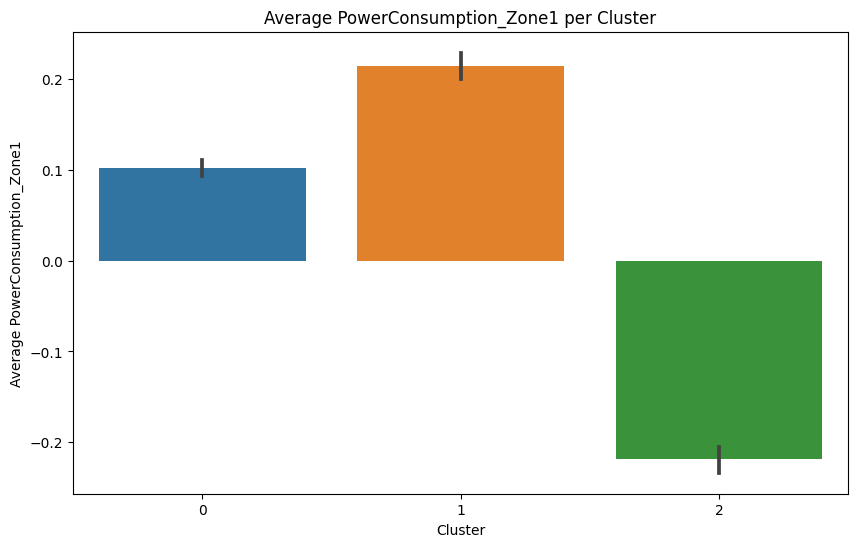

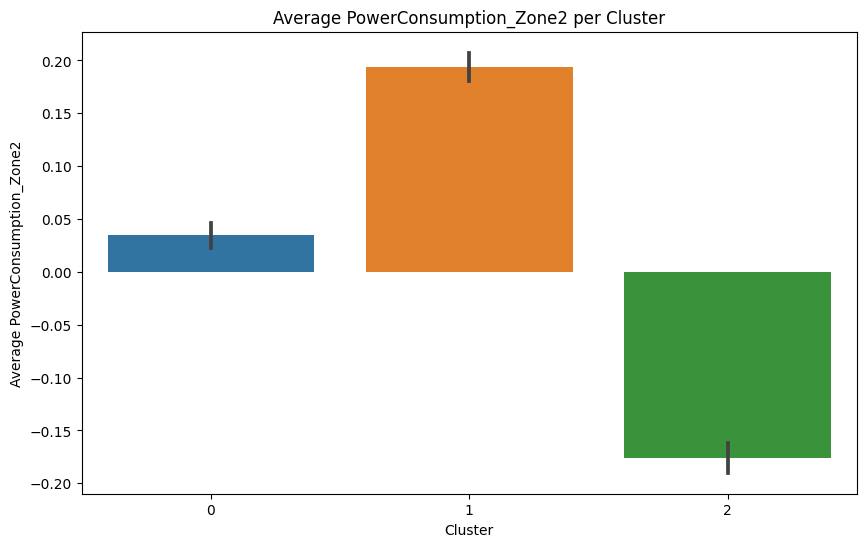

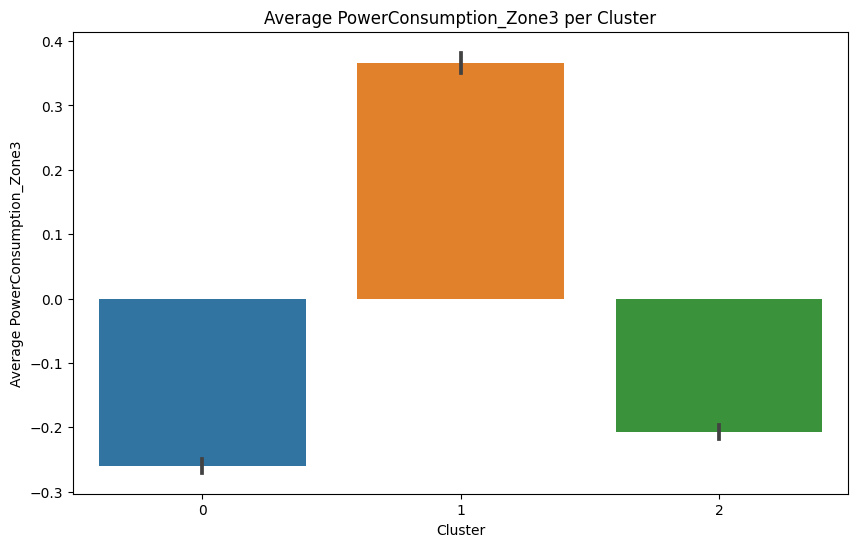

In [ ]:
# Create bar plots for average power consumption per cluster in each zone
for zone in ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cluster', y=zone, data=power_consumption_data, estimator=np.mean)
    plt.title(f'Average {zone} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {zone}')
    plt.show()


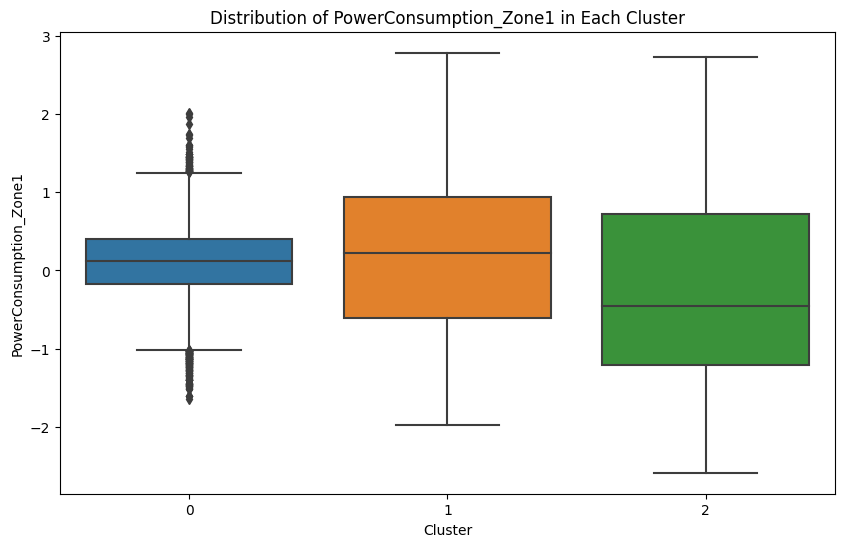

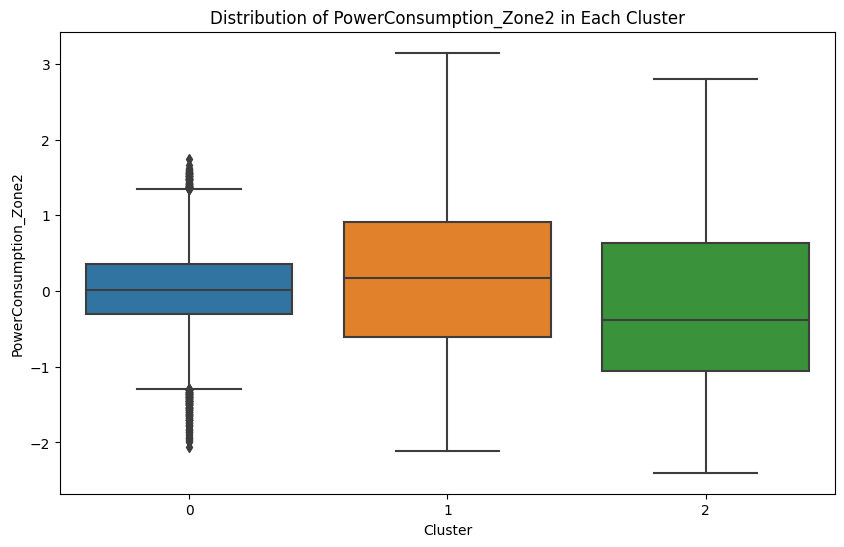

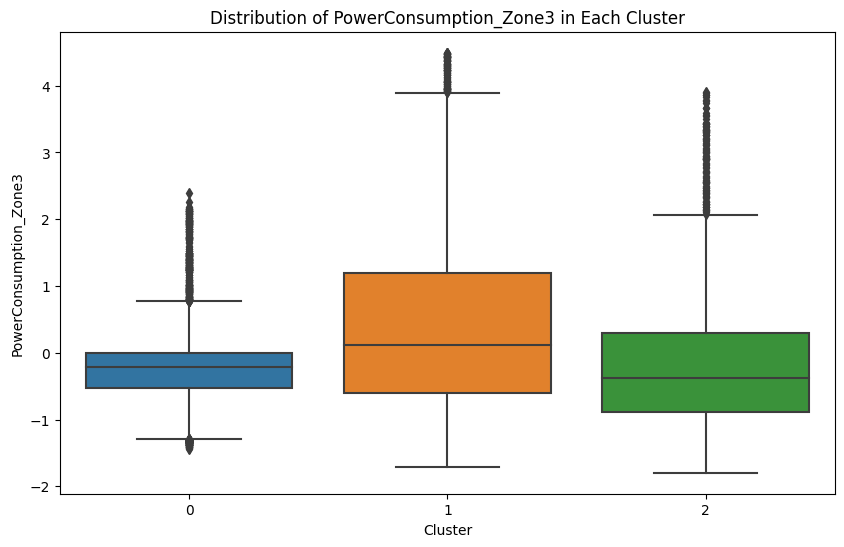

In [ ]:
for zone in ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=zone, data=power_consumption_data)
    plt.title(f'Distribution of {zone} in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(zone)
    plt.show()


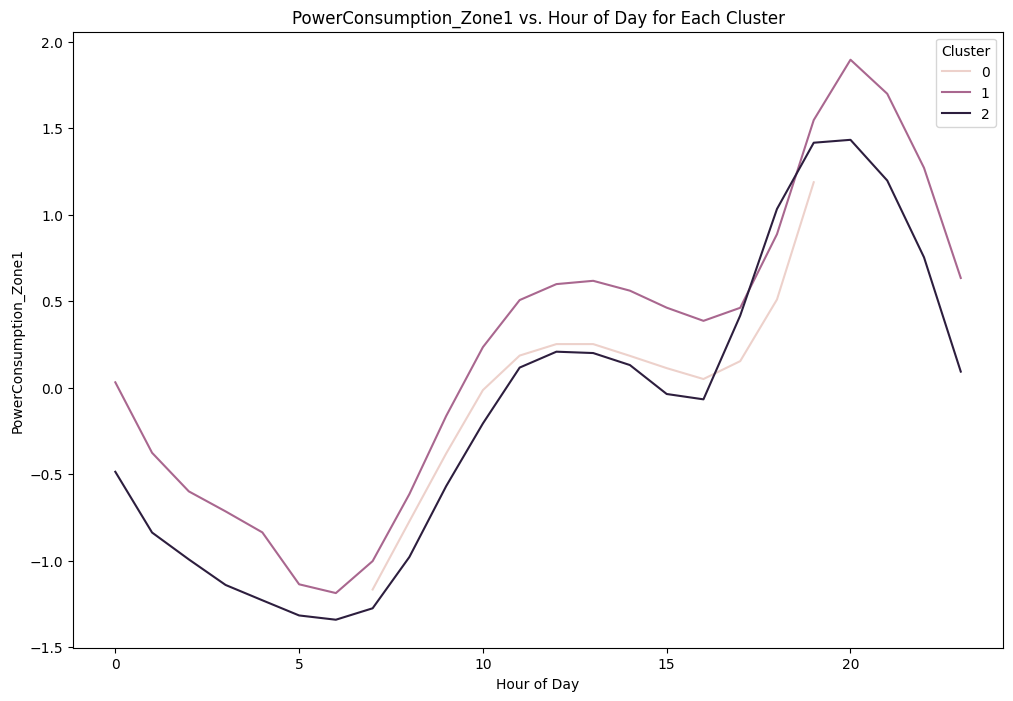

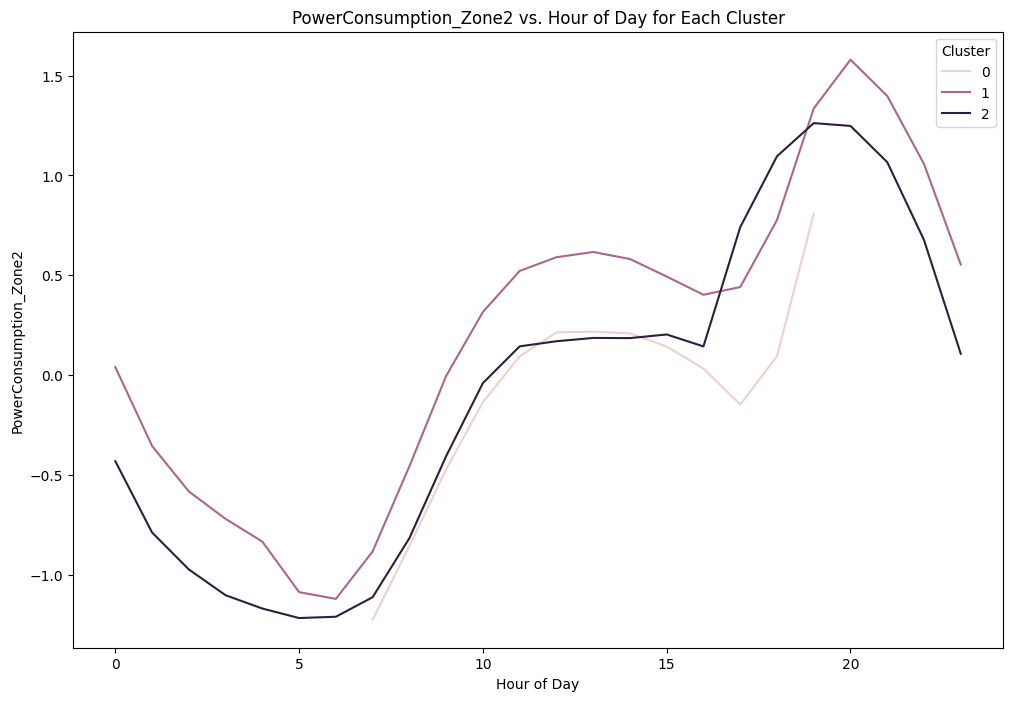

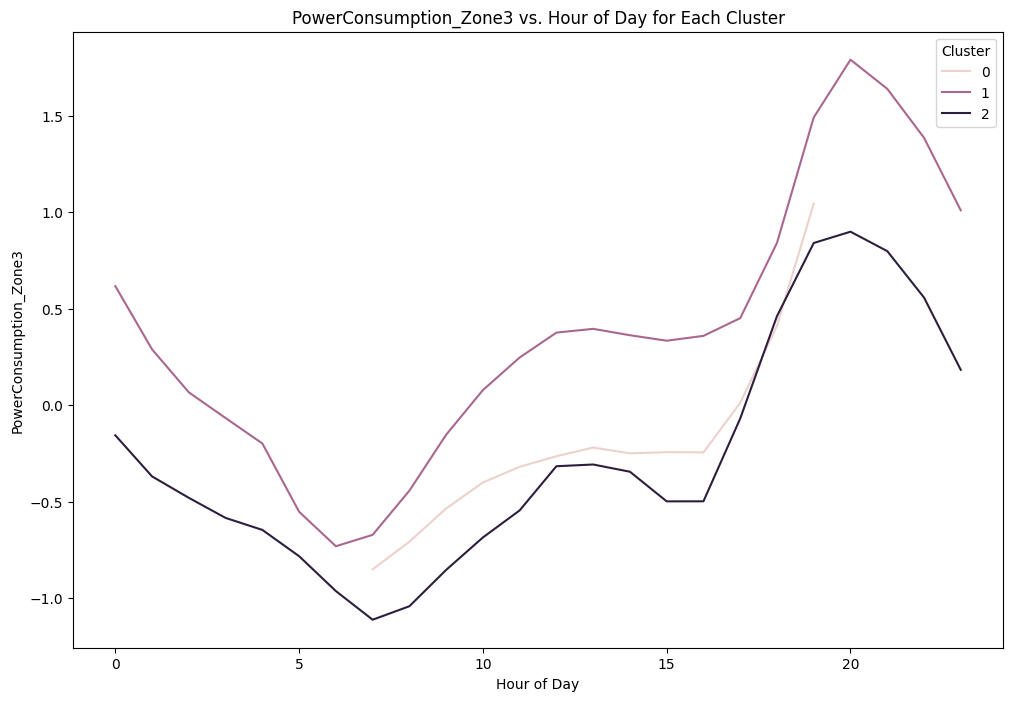

In [ ]:
for zone in ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']:
    plt.figure(figsize=(12, 8))

    # Calculate average power consumption for each hour and cluster
    avg_power = power_consumption_data.groupby(['Hour', 'Cluster'])[zone].mean().reset_index()

    sns.lineplot(x='Hour', y=zone, hue='Cluster', data=avg_power)
    plt.title(f'{zone} vs. Hour of Day for Each Cluster')
    plt.xlabel('Hour of Day')
    plt.ylabel(zone)
    plt.legend(title='Cluster', loc='best')
    plt.show()


**Average Power Consumption per Cluster (Bar Plots):**

Cluster 1 generally has the highest average power consumption across all zones, which may indicate areas with higher residential density, commercial activity, or industrial operations that consume more power.
Cluster 0 shows the lowest average consumption in Zone 2 and Zone 3, suggesting these may be areas with lower occupancy or more efficient energy use, possibly due to effective energy-saving measures or less intensive energy activities.
Cluster 2 has higher consumption than Cluster 0 in Zone 1, indicating a possible mixed-use area with moderate energy usage.
Distribution of Power Consumption (Box Plots):

There is a significant spread in the consumption values in all zones, particularly in Cluster 1, indicating variability in power usage which could be due to a mix of residential, commercial, and industrial properties, or the presence of high-consumption outliers.
The presence of outliers, especially in Zone 1 for Cluster 0 and Zone 3 for Cluster 1, could indicate occasional high power usage which could be due to special events or specific high-demand users.
Power Consumption Trends Over Time (Line Plots):

The line plots indicate a diurnal pattern with power consumption peaking during certain hours which could correspond to business hours or evening times when residential use is high.
The trend lines for the clusters diverge at certain points of the day, especially during the morning and evening hours, which may reflect different operational hours for businesses or lifestyle patterns in residential areas.
The sharp increases and decreases could also indicate the times when energy-intensive operations start and stop within the clusters.

**General Insights:**

Clusters may represent different types of zones (residential, commercial, industrial) with distinct energy consumption profiles.
The variability within clusters can inform targeted energy efficiency interventions or demand response strategies.
The peak times suggest the potential for load-shifting initiatives to balance the energy demand on the grid.
Understanding the consumption patterns could be crucial for energy providers in planning for energy production and grid management.

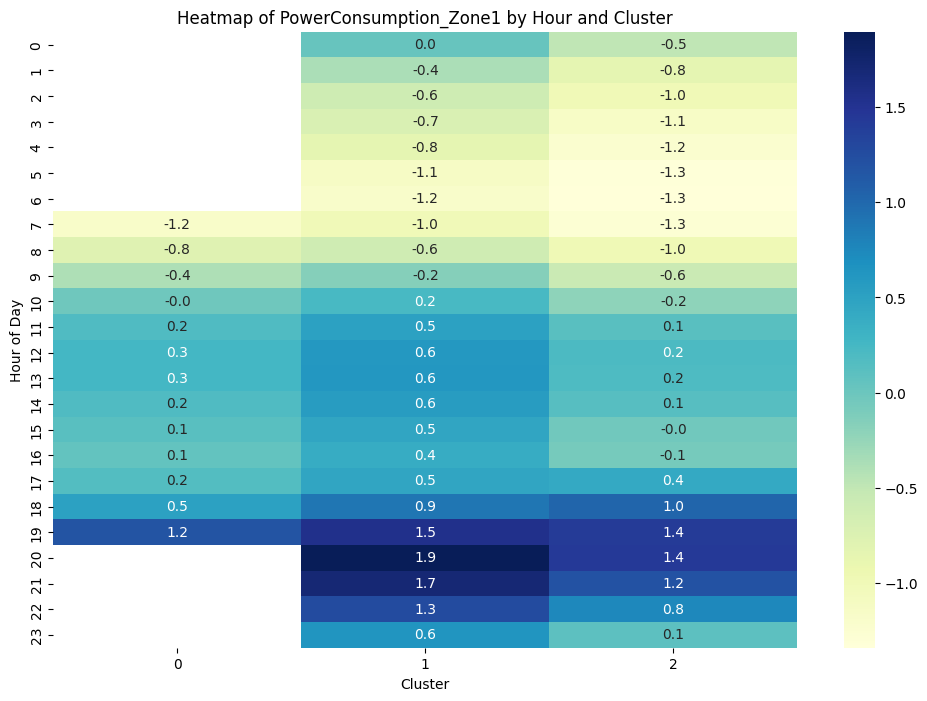

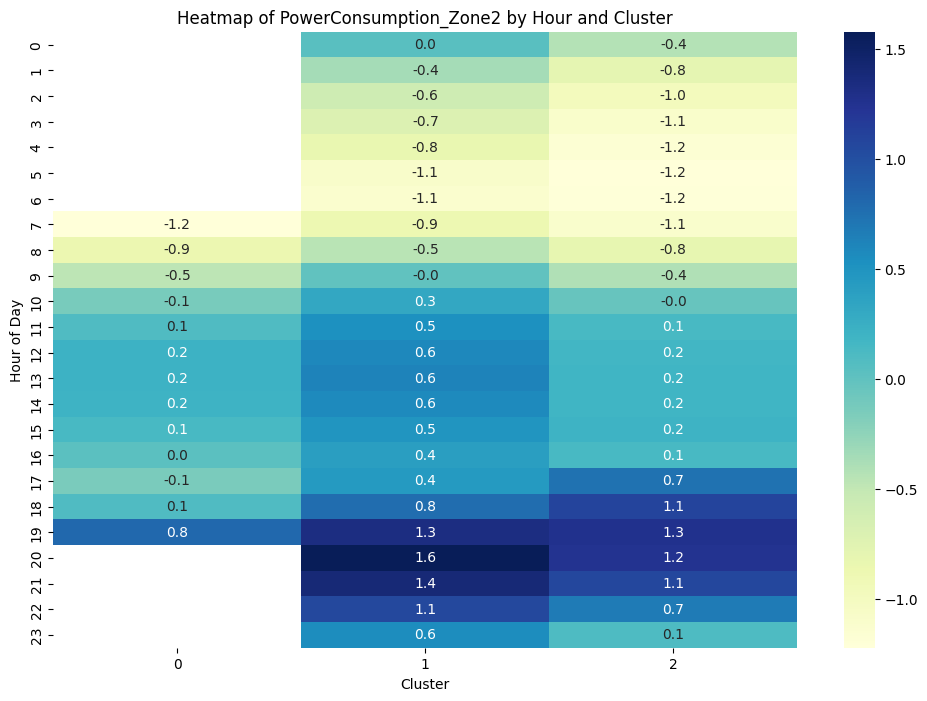

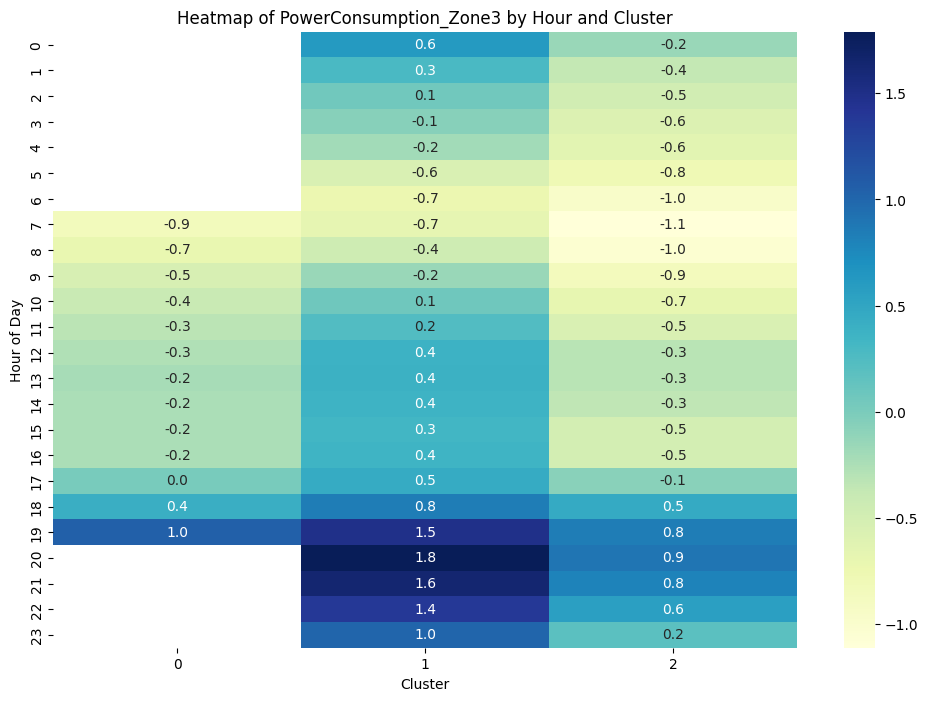

In [ ]:
for zone in ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']:
    pivot_table = power_consumption_data.pivot_table(values=zone, index='Hour', columns='Cluster', aggfunc='mean')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
    plt.title(f'Heatmap of {zone} by Hour and Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Hour of Day')
    plt.show()


**PowerConsumption_Zone1:**

Cluster 0 has relatively uniform power consumption throughout the day with a slight increase in the late evening.
Cluster 1 shows a significant increase in power consumption during the night hours, which could suggest activities that operate during the night or residential use where people are home in the evenings.
Cluster 2 has the least variation but generally lower consumption, possibly indicating areas with consistent low-demand across the day.

**PowerConsumption_Zone2:**

Cluster 0 again shows uniformity but with a noticeable dip in power consumption during the late-night hours, suggesting less activity or shutdown periods.
Cluster 1 exhibits higher power consumption later in the day, similar to Zone1, reinforcing the idea of increased activity or occupancy during these hours.
Cluster 2 has a midday peak, which might indicate commercial or industrial activities that operate during standard business hours.

**PowerConsumption_Zone3:**

Cluster 0 presents an inverse pattern compared to the other zones, with a significant decrease in power consumption during the night, implying a shutdown or lower occupancy at these times.
Cluster 1 and 2 both exhibit higher evening and night consumption, similar to residential patterns observed in Zone1.

**Insights:**

The heatmaps indicate distinct temporal power consumption patterns in each cluster, which may correspond to different types of activities or occupancy patterns.
The evening and night-time peaks in Clusters 1 across zones suggest residential patterns, while the consistent low-demand in Cluster 2 of Zone1 might indicate areas with minimal night-time activity.
The midday peak in Cluster 2 of Zone2 might be related to businesses or industries that have significant daytime operations.
Understanding these patterns can help with energy management and planning, such as implementing demand response strategies or adjusting supply to meet expected consumption.